In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


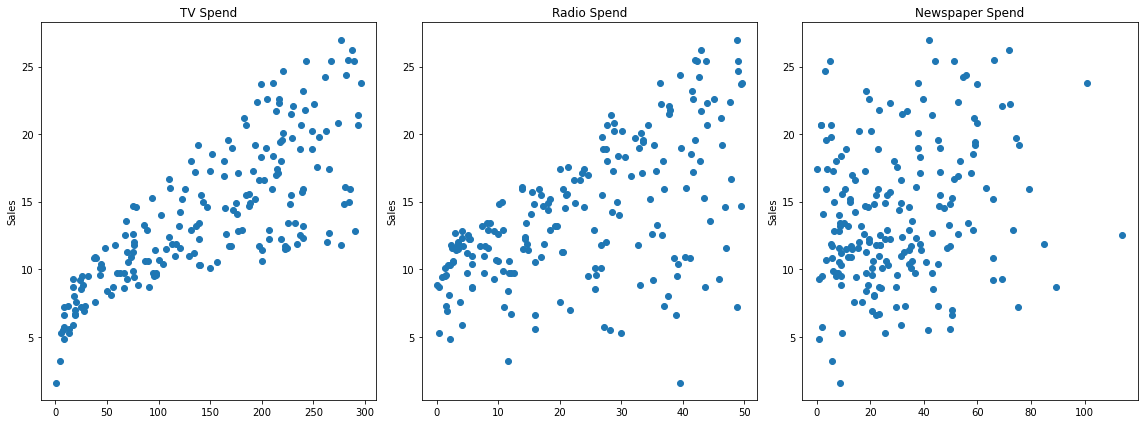

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

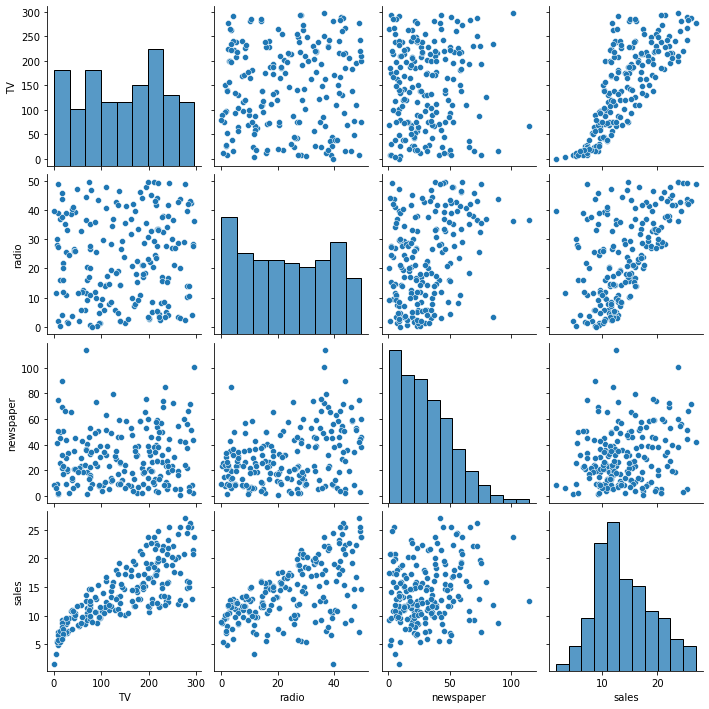

In [5]:
sns.pairplot(df)

In [4]:
X = df.drop('sales', axis=1)

In [5]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [6]:
y = df['sales']

In [7]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
len(df)

200

In [18]:
len(X_test)

60

In [10]:
from sklearn.linear_model import LinearRegression

In [21]:
# help(LinearRegression)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
test_predictions = model.predict(X_test) #y_test

In [17]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

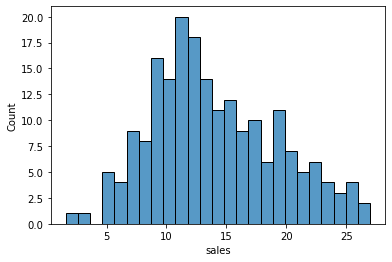

In [21]:
sns.histplot(data=df, x='sales', bins=25)

In [22]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144808

In [25]:
#for RMSE
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

In [16]:
test_residuals = y_test - test_predictions

In [18]:
#test_residuals

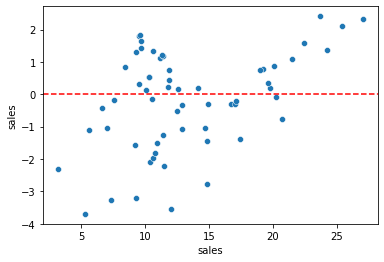

In [22]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0, color='red', ls='dashed')

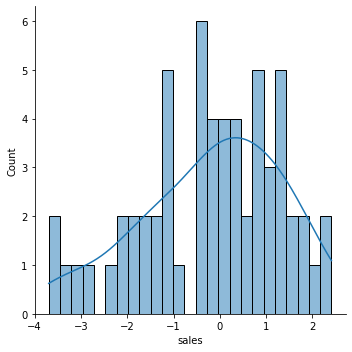

In [24]:
sns.displot(test_residuals, bins=25, kde=True)

In [25]:
import scipy as sp

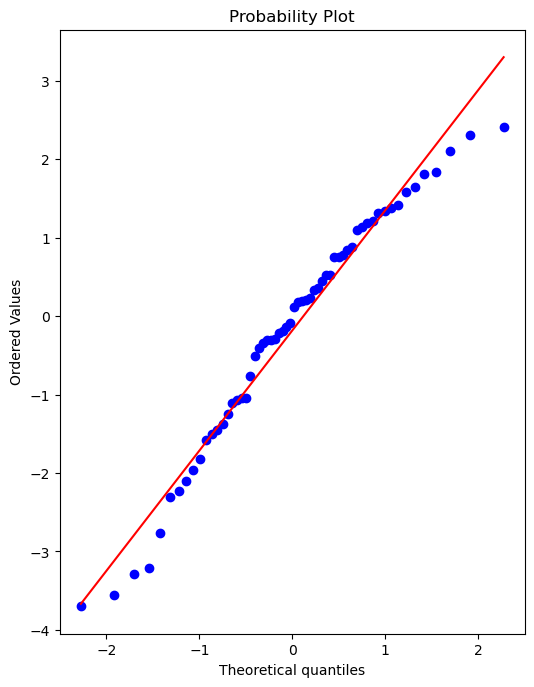

In [26]:
# create a figure and axxis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
# probplot returns the raw valued if needed
# we just want to see the plot, so we addign these values to _
_ = sp.stats.probplot(test_residuals, plot=ax)

In [27]:
final_model = LinearRegression()

In [28]:
final_model.fit(X,y)

LinearRegression()

In [29]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [30]:
y_hat = final_model.predict(X)

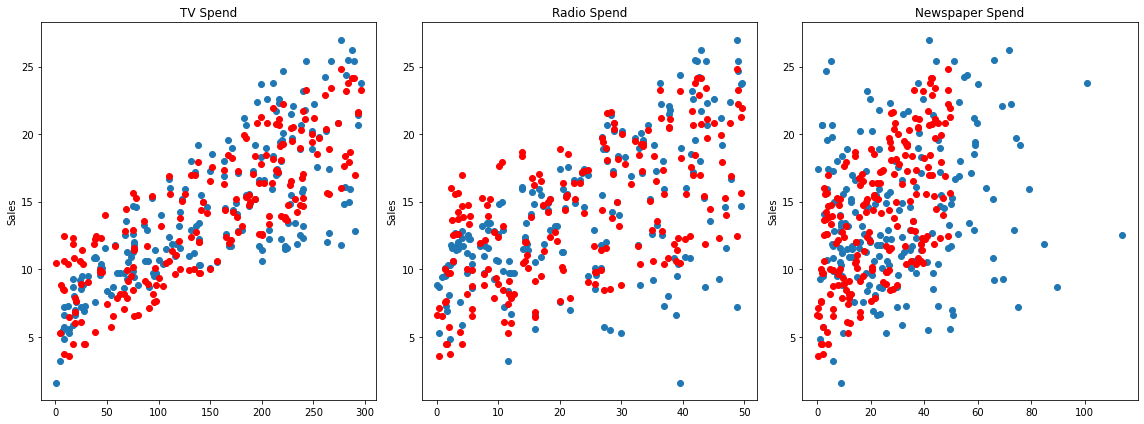

In [31]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [32]:
from joblib import dump,load

In [34]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [35]:
loaded_model = load('final_sales_model.joblib')

In [36]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [37]:
X.shape

(200, 3)

In [38]:
#149 TV, 22 Radio, 12 Newspaper
#Sales?
campaign = [[149,22,12]]

In [39]:
loaded_model.predict(campaign)

array([13.893032])